In [43]:
from ic_calculator import calculate_ic
from beautiful_prints import print_green_blue_colored_pair, print_df
from vigenere import VigenereCipher
import seaborn as sns
import matplotlib.pyplot as plt
from typing import Counter
import pandas as pd
import itertools

In [44]:
alphabet = "абвгдежзийклмнопрстуфхцчшщъыьэюя"

In [45]:
with open("texts/var_3_ct.txt", "r", encoding="utf-8") as f:
    content =  ''.join(filter(lambda char: char in alphabet, f.read().strip()))

In [46]:
print_green_blue_colored_pair("Index of coincidence:", calculate_ic(content))

Index of coincidence: 0.03365878060005469


In [47]:
def calculate_match_statistics(text:str, r: int):
    d_r = 0
    for i in range(len(text)-r):
        if text[i] == text[i+r]:
            d_r += 1
    return d_r

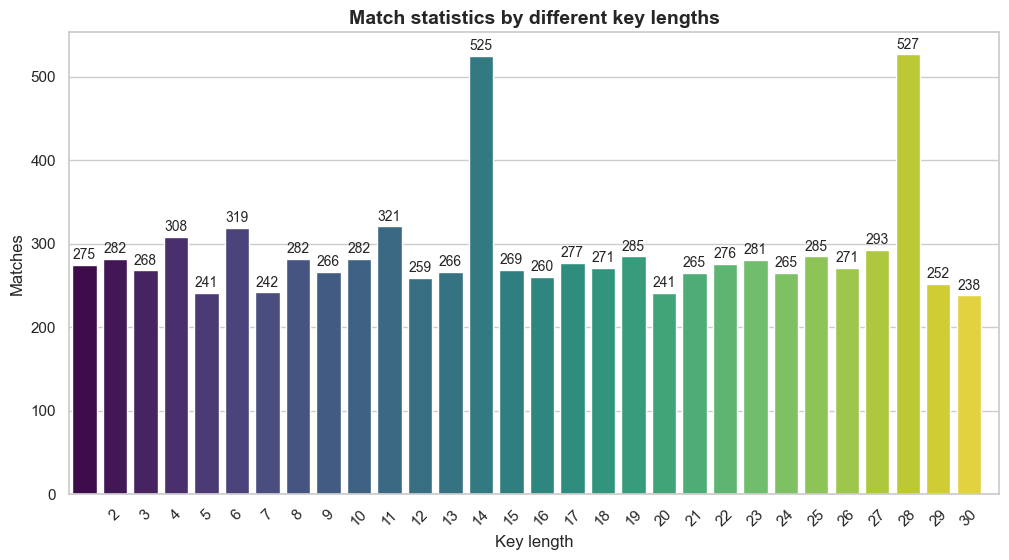

In [48]:
x = range(1,31)
y = [calculate_match_statistics(content, i) for i in x]

plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")

ax = sns.barplot(x=x, y=y, palette="viridis", hue=x, legend=False)
for container in ax.containers:
    ax.bar_label(container, padding=2, fontsize=10)

ax.set_title("Match statistics by different key lengths", fontsize=14, fontweight="bold")
ax.set_xlabel("Key length", fontsize=12)
ax.set_ylabel("Matches", fontsize=12)

plt.xticks(x, rotation=45)

plt.show()

In [49]:
key_len = 14

In [50]:
stats = [content[i::key_len] for i in range(key_len)]

freqs = []
for col in stats:
    total = len(col)
    cnt = Counter(col)
    freqs.append({ch: cnt.get(ch, 0) / total for ch in alphabet})

for i, freq_stat in enumerate(freqs):
    print_green_blue_colored_pair("Position:", i)
    df = pd.Series(freq_stat).sort_values(ascending=False).to_frame().T.reset_index(drop=True)
    print_df(df)


Position: 0
┏━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━┓
┃        л ┃         в ┃         о ┃        е ┃         э ┃         к ┃         п ┃         н ┃         я ┃         й ┃         и ┃         б ┃         м ┃        з ┃         ш ┃         ь ┃         р ┃         ф ┃         щ ┃         ы ┃         ю ┃         д ┃         ж ┃         а ┃          г ┃          ъ ┃          у ┃          т ┃          х ┃          ц ┃          ч ┃   с ┃
┣━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━

In [51]:
key_position_candidates = []
cipher = VigenereCipher("о",alphabet=alphabet)

for stat in freqs:
    sorted_letters = sorted(stat.items(), key=lambda x: x[1], reverse=True)
    letters = [cipher.decrypt(sorted_letters[0][0])]
    diff = sorted_letters[0][1] - sorted_letters[1][1]
    if diff < 0.015:
        letters.append(cipher.decrypt(sorted_letters[1][0]))
    
    key_position_candidates.append(letters)

for i, c in enumerate(key_position_candidates):
    print_green_blue_colored_pair(f"Position {i}:",c)


Position 0: ['э']
Position 1: ['б', 'к']
Position 2: ['о']
Position 3: ['м']
Position 4: ['ч', 'а']
Position 5: ['ц', 'я']
Position 6: ['т']
Position 7: ['н']
Position 8: ['и']
Position 9: ['к', 'б']
Position 10: ['ф']
Position 11: ['у']
Position 12: ['ь', 'к']
Position 13: ['о', 'н']


In [52]:
all_words = ["".join(p) for p in itertools.product(*key_position_candidates)]

for w in all_words:
    print(w)

эбомчцтникфуьо
эбомчцтникфуьн
эбомчцтникфуко
эбомчцтникфукн
эбомчцтнибфуьо
эбомчцтнибфуьн
эбомчцтнибфуко
эбомчцтнибфукн
эбомчятникфуьо
эбомчятникфуьн
эбомчятникфуко
эбомчятникфукн
эбомчятнибфуьо
эбомчятнибфуьн
эбомчятнибфуко
эбомчятнибфукн
эбомацтникфуьо
эбомацтникфуьн
эбомацтникфуко
эбомацтникфукн
эбомацтнибфуьо
эбомацтнибфуьн
эбомацтнибфуко
эбомацтнибфукн
эбомаятникфуьо
эбомаятникфуьн
эбомаятникфуко
эбомаятникфукн
эбомаятнибфуьо
эбомаятнибфуьн
эбомаятнибфуко
эбомаятнибфукн
экомчцтникфуьо
экомчцтникфуьн
экомчцтникфуко
экомчцтникфукн
экомчцтнибфуьо
экомчцтнибфуьн
экомчцтнибфуко
экомчцтнибфукн
экомчятникфуьо
экомчятникфуьн
экомчятникфуко
экомчятникфукн
экомчятнибфуьо
экомчятнибфуьн
экомчятнибфуко
экомчятнибфукн
экомацтникфуьо
экомацтникфуьн
экомацтникфуко
экомацтникфукн
экомацтнибфуьо
экомацтнибфуьн
экомацтнибфуко
экомацтнибфукн
экомаятникфуьо
экомаятникфуьн
экомаятникфуко
экомаятникфукн
экомаятнибфуьо
экомаятнибфуьн
экомаятнибфуко
экомаятнибфукн


In [53]:
pt = VigenereCipher("экомаятникфуко",alphabet).decrypt(content)
with open("texts/var_3_pt.txt", "w", encoding="utf-8") as f:
    f.write(pt)
print_green_blue_colored_pair("Decription result:",f"\n{pt}")

Decription result: 
итутяувиделмаятникшарвисящийнадолгойнитиопущеннойсвольтыхоравизохронномвеличииописывалколебанияязналноивсякийощутилбыподчарамимернойпульсациичтопериодколебанийопределенотношениемквадратногокорнядлинынитикчислуркотороеиррациональноедляподлунныхумовпредлицомбожественнойрационеукоснительносопрягаетокружностисдиаметрамилюбыхсуществующихкруговкакивремяперемещенияшараотодногополюсакпротивоположномупредставляетрезультаттайнойсоотнесенностинаиболеевневременныхмерединственноститочкикреплениядвойственностиабстрактногоизмерениятроичностичислапискрытойчетверичностиквадратногокорнясовершенствакругаещеязналчтонаконцеотвеснойлиниивосстановленнойотточкикреплениянаходящийсяподмаятникоммагнитныйстабилизаторвоссылаеткомандыжелезномусердцушараиобеспечиваетвечностьдвиженияэтохитраяштукаимеющаяцельюпереборотьсопротивлениематериинокотораянепротиворечитзаконуфуконапротивпомогаетемупроявитьсяпотомучтопомещенныйвпустотулюбойточечныйвесприложенныйкконцунерастяжимойиневесомойнитиневстречающийн